<a href="https://colab.research.google.com/github/AustinPariseau/IS4487-Spring-Real/blob/main/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv ('/content/gdrive/MyDrive/IS 4487 Colab/superstore_retail_orders.csv')

df.describe()

Mounted at /content/gdrive


,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as Total_Amount into a number (not a string)
- Remove rows with empty (NULL) values

In [4]:
df['total_amount'] = df['quantity'] * df['product_price']

df.dropna(inplace=True)


df['year_extracted'] = df['order_year_month'].str[:4]
outlier_years = ['2029', '1922', '2421']
df = df[~df['year_extracted'].isin(outlier_years)]

display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55296 entries, 0 to 56044
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          55296 non-null  int64  
 1   order_date        55296 non-null  object 
 2   order_year_month  55296 non-null  object 
 3   customer_name     55296 non-null  object 
 4   city              55296 non-null  object 
 5   state_province    55296 non-null  object 
 6   quantity          55296 non-null  float64
 7   product_name      55296 non-null  object 
 8   product_line      55296 non-null  object 
 9   product_price     55296 non-null  float64
 10  total_amount      55296 non-null  float64
 11  year_extracted    55296 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 5.5+ MB


None

## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- Create a bar chart
- Create a histogram
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales.

In [5]:
total_sales = len(df) - 1

total_sales

55295

In [6]:
df['year_extracted'] = df['order_year_month'].str[:4]
sale_years = df['year_extracted'].unique()

sale_years

<ipython-input-6-1e3611c4160a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_extracted'] = df['order_year_month'].str[:4]


array(['2021', '2022', '2020'], dtype=object)

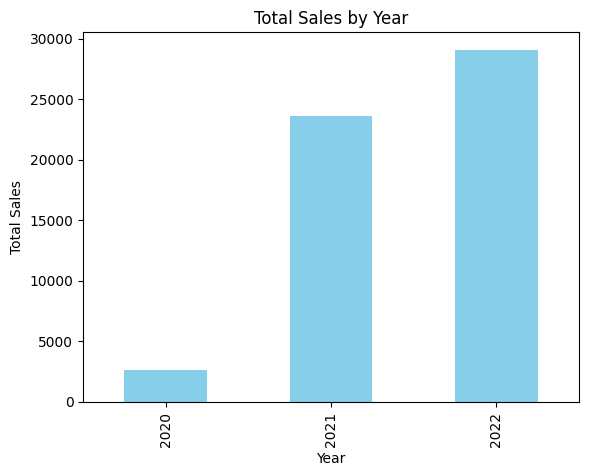

In [7]:
#bar chart
sales_by_year_direct = df.groupby('year_extracted').size()

sales_by_year_direct.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.show()


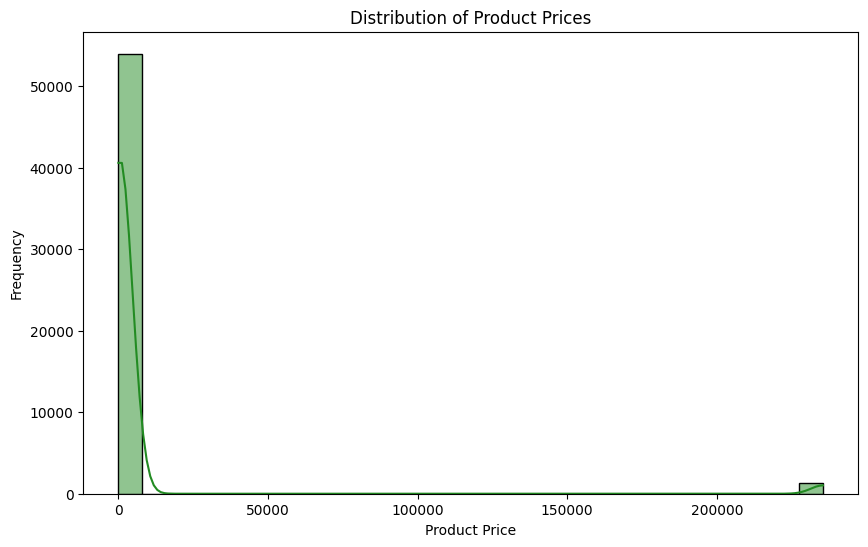

In [8]:
#histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['product_price'], bins=30, kde=True, color='forestgreen')
plt.title('Distribution of Product Prices')
plt.xlabel('Product Price')
plt.ylabel('Frequency')

plt.show()

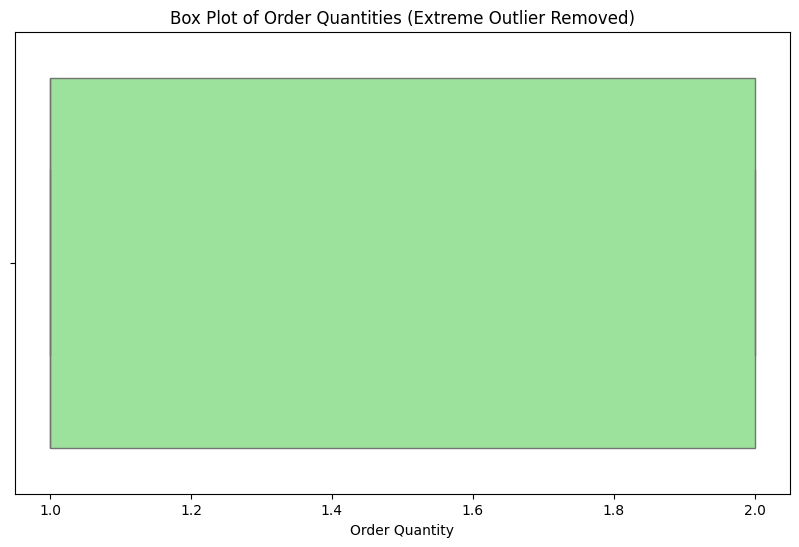

In [9]:
#box plot

extreme_outlier_threshold = df['quantity'].quantile(0.99)  # Using the 99th percentile as a threshold

df_no_extreme_outliers = df[df['quantity'] < extreme_outlier_threshold]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_extreme_outliers['quantity'], color='lightgreen')
plt.title('Box Plot of Order Quantities (Extreme Outlier Removed)')
plt.xlabel('Order Quantity')

plt.show()


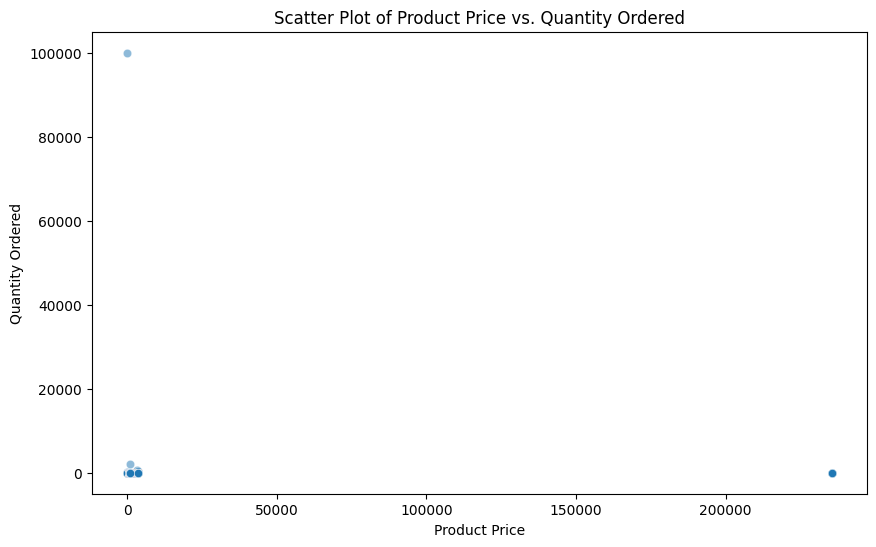

In [21]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_price', y='quantity', data=df, alpha=0.5)
plt.title('Scatter Plot of Product Price vs. Quantity Ordered')
plt.xlabel('Product Price')
plt.ylabel('Quantity Ordered')

plt.show()


## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

In [26]:
#month of year
df['month'] = pd.to_datetime(df['order_date']).dt.month

sales_count_by_month = df.groupby('month').size()

print(sales_count_by_month)

month
1     4887
2     4769
3     5213
4     5450
5     5870
6     5739
7     1629
8     3960
9     3877
10    4246
11    4222
12    5434
dtype: int64


In [28]:
#sales by state
sales_count_by_state = df.groupby('state_province').size().sort_values(ascending=False)

print(sales_count_by_state)

state_province
ARIZONA                      1346
UTAH                         1211
MISSISSIPPI                  1193
NORTH CAROLINA               1172
MARYLAND                     1170
MAINE                        1167
SOUTH CAROLINA               1166
ARKANSAS                     1164
MINNESOTA                    1163
COLORADO                     1146
CONNECTICUT                  1142
MASSACHUSETTS                1142
WASHINGTON                   1142
GEORGIA                      1140
MISSOURI                     1135
OREGON                       1133
RHODE ISLAND                 1133
WEST VIRGINIA                1133
VERMONT                      1117
IDAHO                        1109
NEW MEXICO                   1106
DELAWARE                     1105
KENTUCKY                     1102
SOUTH DAKOTA                 1102
FLORIDA                      1101
PENNSYLVANIA                 1093
NEVADA                       1090
NEW HAMPSHIRE                1082
WISCONSIN                    1082

In [30]:
#sales by product
sales_count_by_product = df.groupby('product_name').size().sort_values(ascending=False)

print(sales_count_by_product)

product_name
Water Bottle - 30 oz.                                                                                          3922
E-COSMOS 5V 1.2W Portable Flexible USB LED Light                                                               2920
GIZGA essentials Universal Silicone Keyboard Protector Skin                                                    2825
Inventis 5V 1.2W Portable Flexible USB LED Light Lamp                                                          2143
Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM, 128GB Storage) with No Cost EMI & Additional Exchange Offers    2073
                                                                                                               ... 
Projector Black, 42                                                                                              26
Projector Black, 38                                                                                              25
Projector Silver, 42                                       

## Pair Plot

➡️ Assignment Tasks
- Create a pair plot showing any relevant variables, with the color determined by total sales

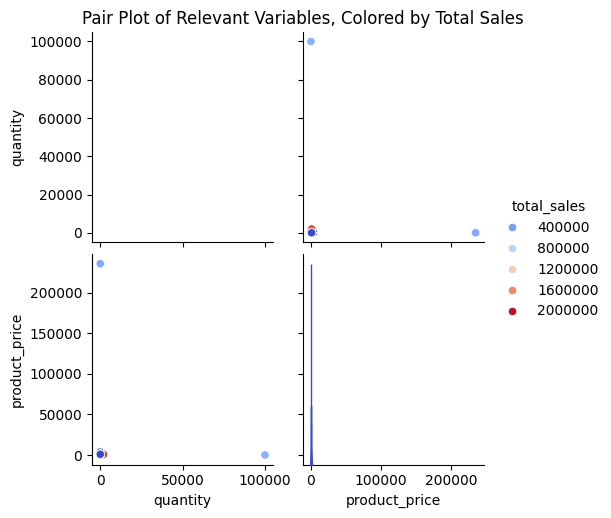

In [35]:
#pair plot
df['total_sales'] = df['quantity'] * df['product_price']

columns_of_interest = ['quantity', 'product_price', 'total_sales']
pair_plot = sns.pairplot(df[columns_of_interest], hue='total_sales', palette="coolwarm")
pair_plot.fig.suptitle("Pair Plot of Relevant Variables, Colored by Total Sales", y=1.02)

pair_plot